# Air Temperature Increase in African Water Basins

The goal of this project is to plot a figure showing the average increaes in air temperature in African Water Basics, from 2000-2014. 

## Imports

In [ ]:
#Importing all the right modules 
! pip install fiona shapely pyproj rtree --q
! pip install geopandas --q

import geopandas as gpd
import pandas as pd 
import numpy as np 

from plotnine import *
import plotnine 

## Read Data

In [ ]:
! wget https://97dc600d3ccc765f840c-d5a4231de41cd7a15e06ac00b0bcc552.ssl.cf5.rackcdn.com/HydroLAKES_polys_v10_shp.zip

--2021-10-24 21:36:08--  https://97dc600d3ccc765f840c-d5a4231de41cd7a15e06ac00b0bcc552.ssl.cf5.rackcdn.com/HydroLAKES_polys_v10_shp.zip
Resolving 97dc600d3ccc765f840c-d5a4231de41cd7a15e06ac00b0bcc552.ssl.cf5.rackcdn.com (97dc600d3ccc765f840c-d5a4231de41cd7a15e06ac00b0bcc552.ssl.cf5.rackcdn.com)... 184.85.236.211
Connecting to 97dc600d3ccc765f840c-d5a4231de41cd7a15e06ac00b0bcc552.ssl.cf5.rackcdn.com (97dc600d3ccc765f840c-d5a4231de41cd7a15e06ac00b0bcc552.ssl.cf5.rackcdn.com)|184.85.236.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 820295132 (782M) [application/zip]
Saving to: ‘HydroLAKES_polys_v10_shp.zip.2’

HydroLAKES_polys_v1 100%[===================>] 782.29M  10.8MB/s    in 1m 58s  

2021-10-24 21:38:07 (6.65 MB/s) - ‘HydroLAKES_polys_v10_shp.zip.2’ saved [820295132/820295132]



In [ ]:
! ls HydroLAKES_polys_v10_shp.zip.1


HydroLAKES_polys_v10_shp.zip.1


In [ ]:
! unzip HydroLAKES_polys_v10_shp.zip.1


Archive:  HydroLAKES_polys_v10_shp.zip.1
replace HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
df_HydroLakes = gpd.read_file('HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.shp')


In [ ]:
df_HydroLakes

,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,Vol_total,Vol_res,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,geometry
0,1,Caspian Sea,Russia,Europe,SWBD,1,0,377001.91,15829.37,7.27,75600000.00,0.0,1,200.5,8110.642,107883.0,-29,-1.00,1404108.0,47.717708,45.591934,"POLYGON ((49.96181 37.43847, 49.96457 37.44022..."
1,2,Great Bear,Canada,North America,CanVec,1,0,30450.64,5331.72,8.62,2200000.00,0.0,1,72.2,535.187,47577.7,145,-1.00,147665.4,-123.505546,65.138384,"POLYGON ((-119.78782 67.03574, -119.78637 67.0..."
2,3,Great Slave,Canada,North America,CanVec,1,0,26734.29,9814.16,16.93,1580000.00,0.0,1,59.1,4350.692,4203.2,148,-1.00,995312.3,-117.617115,61.311727,"POLYGON ((-109.93976 62.95851, -109.93831 62.9..."
3,4,Winnipeg,Canada,North America,CanVec,3,709,23923.04,4018.32,7.33,284000.00,31790.0,1,11.9,2244.727,1464.3,215,-1.00,919611.5,-97.863542,53.696359,"POLYGON ((-98.80636 53.88021, -98.80578 53.880..."
4,5,Superior,United States of America,North America,SWBD,1,0,81843.92,5248.36,5.18,12004000.00,0.0,1,146.7,2869.953,48410.3,179,-1.00,209219.5,-84.460547,46.468593,"POLYGON ((-90.72250 46.65740, -90.72458 46.657..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427683,1427684,None,New Zealand,Oceania,SWBD,1,0,0.29,2.30,1.20,1.51,0.0,3,5.1,0.125,139.6,1,4.83,4.4,169.147152,-52.592307,"POLYGON ((169.14763 -52.59291, 169.14750 -52.5..."
1427684,1427685,None,Australia,Oceania,SWBD,1,0,0.10,1.66,1.52,0.20,0.0,3,2.1,-9999.000,-9999.0,1,1.04,-9999.0,73.305108,-52.973622,"POLYGON ((73.30605 -52.97318, 73.30540 -52.974..."
1427685,1427686,None,Australia,Oceania,SWBD,1,0,0.24,1.92,1.10,0.89,0.0,3,3.7,0.013,792.4,205,2.63,0.2,158.892278,-54.529970,"POLYGON ((158.89124 -54.53117, 158.88696 -54.5..."
1427686,1427687,None,Australia,Oceania,SWBD,1,0,0.34,2.95,1.44,2.18,0.0,3,6.5,0.020,1263.9,163,7.58,0.4,158.889583,-54.594300,"POLYGON ((158.88858 -54.59767, 158.88833 -54.5..."


In [ ]:
df_HydroLakes = df_HydroLakes[df_HydroLakes['Continent'] == 'Africa']

In [ ]:
df_HydroLakes

,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,Vol_total,Vol_res,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,geometry
14,15,Chad,Chad,Africa,Other,1,0,18751.52,817.00,1.68,2400.00,0.0,1,0.1,1085.078,25.6,282,-1.00,980211.9,14.527083,13.077083,"POLYGON ((13.33968 14.34845, 13.35371 14.34654..."
15,16,Victoria,Uganda,Africa,SWBD,3,4492,67166.22,7422.44,8.08,2760000.00,204800.0,1,41.1,1735.515,18406.3,1134,-1.00,265372.8,33.193791,0.430999,"POLYGON ((31.91181 -2.72236, 31.91141 -2.72289..."
16,17,Tanganyika,Democratic Republic of the Congo,Africa,SWBD,1,0,32826.65,2126.23,3.31,18940000.00,0.0,1,577.0,1490.748,147049.0,767,-1.00,239411.9,29.185417,-5.911180,"POLYGON ((29.18881 -3.34623, 29.19245 -3.34670..."
17,18,Malawi,Malawi,Africa,SWBD,1,0,29544.00,1718.97,2.82,7720000.00,0.0,1,261.3,1119.676,79801.5,476,-1.00,128727.2,35.236458,-14.417702,"POLYGON ((34.58819 -13.87931, 34.58832 -13.880..."
151,152,Nasser,Egypt,Africa,SWBD,2,4478,5385.34,7201.04,27.68,162000.00,162000.0,2,30.1,2669.791,702.3,179,-1.00,2764126.0,32.886458,23.967280,"POLYGON ((32.97069 23.41986, 32.97030 23.41953..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426092,1426093,None,South Africa,Africa,SWBD,1,0,0.25,2.81,1.59,1.26,0.0,3,5.1,0.266,54.7,165,5.02,34.0,19.235269,-34.367381,"POLYGON ((19.23487 -34.36509, 19.23579 -34.366..."
1426166,1426167,None,South Africa,Africa,SWBD,1,0,0.79,7.41,2.36,3.72,0.0,3,4.7,0.490,87.9,28,3.01,209.8,19.486664,-34.567643,"POLYGON ((19.50874 -34.55765, 19.50579 -34.560..."
1426177,1426178,None,South Africa,Africa,SWBD,1,0,0.21,2.31,1.42,0.79,0.0,3,3.7,0.067,136.7,94,2.80,19.3,19.609669,-34.611179,"POLYGON ((19.61098 -34.61241, 19.61199 -34.613..."
1426179,1426180,None,South Africa,Africa,SWBD,1,0,0.19,1.92,1.24,0.35,0.0,3,1.8,0.020,202.8,21,0.66,8.7,19.893091,-34.621755,"POLYGON ((19.89332 -34.62276, 19.89319 -34.622..."


In [ ]:
! wget https://www.dropbox.com/sh/hmpwobbz9qixxpe/AACiujdXJ5DfsaK7zcKOJyZpa/HydroBASINS/customized/af/hybas_lake_af_lev01-12_v1c.zip?dl=0


--2021-10-24 21:42:13--  https://www.dropbox.com/sh/hmpwobbz9qixxpe/AACiujdXJ5DfsaK7zcKOJyZpa/HydroBASINS/customized/af/hybas_lake_af_lev01-12_v1c.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/hmpwobbz9qixxpe/AACiujdXJ5DfsaK7zcKOJyZpa/HydroBASINS/customized/af/hybas_lake_af_lev01-12_v1c.zip [following]
--2021-10-24 21:42:14--  https://www.dropbox.com/sh/raw/hmpwobbz9qixxpe/AACiujdXJ5DfsaK7zcKOJyZpa/HydroBASINS/customized/af/hybas_lake_af_lev01-12_v1c.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc7043c9be88ef7a95319960c23.dl.dropboxusercontent.com/cd/0/inline/BYpxyc7ZUhkwbTJzlykOfd7XFPqHsSrsK4jlvPcLmihdGQObn7COkK8oN_DUhKKJpIHaX5ytXJSb2CQC8KHApNfIqcTZslyQnHfrHCqvz1LjBMQuM6F_cHmoSnxNZ5d9tKxiTI_5_An5Z

In [ ]:
! ls 

 basin_temp_africa_2000_2014.csv	  hybas_lake_af_lev07_v1c.prj
'hybas_lake_af_lev01-12_v1c.zip?dl=0'	  hybas_lake_af_lev07_v1c.sbn
'hybas_lake_af_lev01-12_v1c.zip?dl=0.1'   hybas_lake_af_lev07_v1c.sbx
'hybas_lake_af_lev01-12_v1c.zip?dl=0.2'   hybas_lake_af_lev07_v1c.shp
'hybas_lake_af_lev01-12_v1c.zip?dl=0.3'   hybas_lake_af_lev07_v1c.shp.xml
'hybas_lake_af_lev01-12_v1c.zip?dl=0.4'   hybas_lake_af_lev07_v1c.shx
 hybas_lake_af_lev01_v1c.dbf		  hybas_lake_af_lev08_v1c.dbf
 hybas_lake_af_lev01_v1c.prj		  hybas_lake_af_lev08_v1c.prj
 hybas_lake_af_lev01_v1c.sbn		  hybas_lake_af_lev08_v1c.sbn
 hybas_lake_af_lev01_v1c.sbx		  hybas_lake_af_lev08_v1c.sbx
 hybas_lake_af_lev01_v1c.shp		  hybas_lake_af_lev08_v1c.shp
 hybas_lake_af_lev01_v1c.shp.xml	  hybas_lake_af_lev08_v1c.shp.xml
 hybas_lake_af_lev01_v1c.shx		  hybas_lake_af_lev08_v1c.shx
 hybas_lake_af_lev02_v1c.dbf		  hybas_lake_af_lev09_v1c.dbf
 hybas_lake_af_lev02_v1c.prj		  hybas_lake_af_lev09_v1c.prj
 hybas_lake_af_lev02_v1c.sbn		  hybas_

In [ ]:
df_HydroBasin_1 = gpd.read_file('hybas_lake_af_lev01_v1c.shp')

In [ ]:
df_HydroBasin_2 = gpd.read_file('hybas_lake_af_lev02_v1c.shp')
df_HydroBasin_3 = gpd.read_file('hybas_lake_af_lev03_v1c.shp')
df_HydroBasin_4 = gpd.read_file('hybas_lake_af_lev04_v1c.shp')
df_HydroBasin_5 = gpd.read_file('hybas_lake_af_lev05_v1c.shp')
df_HydroBasin_6 = gpd.read_file('hybas_lake_af_lev06_v1c.shp')
df_HydroBasin_7 = gpd.read_file('hybas_lake_af_lev07_v1c.shp')
df_HydroBasin_8 = gpd.read_file('hybas_lake_af_lev08_v1c.shp')
df_HydroBasin_9 = gpd.read_file('hybas_lake_af_lev09_v1c.shp')

In [ ]:
#Appending the Hydrobasin data frames 
df_HydroBasin_Ttl = df_HydroBasin_1.append([df_HydroBasin_2, df_HydroBasin_3, df_HydroBasin_4, df_HydroBasin_5, df_HydroBasin_6, df_HydroBasin_7, df_HydroBasin_8, df_HydroBasin_9])

In [ ]:
df_HydroBasin_Ttl

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,SIDE,LAKE,ENDO,COAST,ORDER,SORT,geometry
0,1010000010,0,1010000010,1010000010,0.0,0.0,29953552.4,29953552.0,1,M,0,0,1,0,1,"MULTIPOLYGON (((33.67778 27.62917, 33.67119 27..."
0,1020000010,0,1020000010,1020000010,0.0,0.0,3258360.8,3258360.8,11,M,0,0,1,0,1,"MULTIPOLYGON (((33.67778 27.62917, 33.67119 27..."
1,1020011530,0,1020011530,1020011530,0.0,0.0,4660107.7,4660107.7,12,M,0,0,1,0,2,"MULTIPOLYGON (((34.80278 -19.81667, 34.79279 -..."
2,1020018110,0,1020018110,1020018110,0.0,0.0,4900488.0,4900488.0,13,M,0,0,1,0,3,"MULTIPOLYGON (((5.64444 -1.47083, 5.62972 -1.4..."
3,1020021940,0,1020021940,1020021940,0.0,0.0,4046885.0,4046885.0,14,M,0,0,1,0,4,"MULTIPOLYGON (((-12.43056 7.54167, -12.44087 7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115621,1090082530,1091218980,1090082530,1090009010,0.0,415.8,8.4,8.6,117349050,M,0,2,0,2,115622,"POLYGON ((36.94167 -3.30000, 36.92674 -3.29965..."
115622,1090082540,0,1090082540,1090082540,0.0,0.0,8.1,8.4,115802020,M,0,2,0,1,115623,"POLYGON ((40.18750 13.01667, 40.18816 13.02410..."
115623,1090082570,0,1090082570,1090082570,0.0,0.0,7.0,7.1,115209090,M,0,2,0,1,115624,"POLYGON ((36.56250 -1.29583, 36.55091 -1.29521..."
115624,1090082590,1091221572,1090082590,1090009010,0.0,417.3,6.2,6.4,117348060,M,0,2,0,4,115625,"POLYGON ((37.68750 -3.32917, 37.68418 -3.32832..."


In [ ]:
#Read in Water Basin Mean annual Temp 
! wget https://raw.githubusercontent.com/envirodatascience/ENVS-617-Class-Data/main/basin_temp_africa_2000_2014.csv

--2021-10-24 21:42:43--  https://raw.githubusercontent.com/envirodatascience/ENVS-617-Class-Data/main/basin_temp_africa_2000_2014.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 578118 (565K) [text/plain]
Saving to: ‘basin_temp_africa_2000_2014.csv.1’

basin_temp_africa_2 100%[===================>] 564.57K  --.-KB/s    in 0.04s   

2021-10-24 21:42:43 (13.4 MB/s) - ‘basin_temp_africa_2000_2014.csv.1’ saved [578118/578118]



In [ ]:
! ls 

 basin_temp_africa_2000_2014.csv	  hybas_lake_af_lev07_v1c.dbf
 basin_temp_africa_2000_2014.csv.1	  hybas_lake_af_lev07_v1c.prj
'hybas_lake_af_lev01-12_v1c.zip?dl=0'	  hybas_lake_af_lev07_v1c.sbn
'hybas_lake_af_lev01-12_v1c.zip?dl=0.1'   hybas_lake_af_lev07_v1c.sbx
'hybas_lake_af_lev01-12_v1c.zip?dl=0.2'   hybas_lake_af_lev07_v1c.shp
'hybas_lake_af_lev01-12_v1c.zip?dl=0.3'   hybas_lake_af_lev07_v1c.shp.xml
'hybas_lake_af_lev01-12_v1c.zip?dl=0.4'   hybas_lake_af_lev07_v1c.shx
 hybas_lake_af_lev01_v1c.dbf		  hybas_lake_af_lev08_v1c.dbf
 hybas_lake_af_lev01_v1c.prj		  hybas_lake_af_lev08_v1c.prj
 hybas_lake_af_lev01_v1c.sbn		  hybas_lake_af_lev08_v1c.sbn
 hybas_lake_af_lev01_v1c.sbx		  hybas_lake_af_lev08_v1c.sbx
 hybas_lake_af_lev01_v1c.shp		  hybas_lake_af_lev08_v1c.shp
 hybas_lake_af_lev01_v1c.shp.xml	  hybas_lake_af_lev08_v1c.shp.xml
 hybas_lake_af_lev01_v1c.shx		  hybas_lake_af_lev08_v1c.shx
 hybas_lake_af_lev02_v1c.dbf		  hybas_lake_af_lev09_v1c.dbf
 hybas_lake_af_lev02_v1c.prj		  h

In [ ]:
df_Annual_temp = pd.read_csv('basin_temp_africa_2000_2014.csv') 


In [ ]:
df_Annual_temp.head()

,Year,HYBAS_ID,mean_annual_temp_k
0,2000,1120030770,291.392984
1,2000,1120032100,293.570814
2,2000,1121453520,297.826864
3,2000,1090048530,293.746552
4,2000,1120137260,294.257130


In [ ]:
#Pivot the Water basin mean annual temp data wide
df_Annual_temp_wide = df_Annual_temp.pivot(index='HYBAS_ID', columns='Year', values='mean_annual_temp_k').reset_index()
df_Annual_temp_wide.head()

Year,HYBAS_ID,2000,2014
0,1020011530,293.860050,294.006249
1,1030008100,298.930491,298.907453
2,1030008110,297.194428,297.007177
3,1030011660,295.516935,295.599848
4,1030012590,293.919608,294.596602


In [ ]:
#Rename columns as strings: 
df_Annual_temp_wide.rename(columns={2000: "2000", 2014: "2014"}, inplace = True)

In [ ]:
df_Annual_temp_wide['Change_in_Temp_2000_2014'] = df_Annual_temp_wide['2014'] - df_Annual_temp_wide['2000']


In [ ]:
df_Annual_temp_wide

Year,HYBAS_ID,2000,2014,Change_in_Temp_2000_2014
0,1020011530,293.860050,294.006249,0.146200
1,1030008100,298.930491,298.907453,-0.023037
2,1030008110,297.194428,297.007177,-0.187252
3,1030011660,295.516935,295.599848,0.082913
4,1030012590,293.919608,294.596602,0.676994
...,...,...,...,...
8784,2120826590,294.008656,294.985769,0.977113
8785,2120826600,293.908179,294.884785,0.976606
8786,2120829200,293.930317,294.923461,0.993144
8787,2120829280,293.680884,294.690491,1.009607


In [ ]:
#Merge Temperature data with HydroBasin data
Hydro_Basin_Temp = df_HydroBasin_Ttl.merge(df_Annual_temp_wide, how = 'inner', on = "HYBAS_ID")


In [ ]:
Hydro_Basin_Temp

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,SIDE,LAKE,ENDO,COAST,ORDER,SORT,geometry,2000,2014,Change_in_Temp_2000_2014
0,1020011530,0,1020011530,1020011530,0.0,0.0,4660107.7,4660107.7,12,M,0,0,1,0,2,"MULTIPOLYGON (((34.80278 -19.81667, 34.79279 -...",293.860050,294.006249,0.146200
1,1030008100,0,1030008100,1030008100,0.0,0.0,797881.4,797881.4,114,M,0,0,0,1,3,"POLYGON ((36.74167 4.06667, 36.74131 4.06909, ...",298.930491,298.907453,-0.023037
2,1030008110,0,1030008110,1030008110,0.0,0.0,1040224.9,1040224.9,117,M,0,0,1,0,4,"MULTIPOLYGON (((40.84444 -2.43333, 40.83833 -2...",297.194428,297.007177,-0.187252
3,1030011660,0,1030011660,1030011660,0.0,0.0,1378103.3,1378121.1,122,M,0,0,0,1,6,"POLYGON ((35.71667 -16.48333, 35.72083 -16.483...",295.516935,295.599848,0.082913
4,1030012590,0,1030012590,1030012590,0.0,0.0,412581.2,412581.2,124,M,0,0,0,1,8,"POLYGON ((26.30833 -22.82083, 26.30798 -22.814...",293.919608,294.596602,0.676994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1090058020,0,1090058020,1090058020,0.0,0.0,441.8,442.0,153090033,M,0,2,0,1,113717,"POLYGON ((9.93750 35.04583, 9.96250 35.04583, ...",292.516431,292.625690,0.109259
1131,1090058080,1091629090,1090058080,1090015850,0.0,1382.7,437.4,437.4,127923001,M,0,2,0,3,113723,"POLYGON ((26.00381 -28.44409, 26.00035 -28.447...",290.677337,291.195916,0.518579
1132,1090060190,0,1090060190,1090060190,0.0,0.0,361.5,361.7,126000301,M,0,2,0,1,113933,"POLYGON ((19.80000 -30.09167, 19.81495 -30.092...",291.152990,291.351783,0.198794
1133,1090062890,1091528930,1090062890,1090040200,0.0,1.2,283.1,283.5,129102000,M,0,2,0,5,114197,"POLYGON ((26.38333 -21.46667, 26.37991 -21.465...",294.263683,294.685906,0.422224


In [ ]:
Hydro_Basin_Temp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
df_HydroLakes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Plotting


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


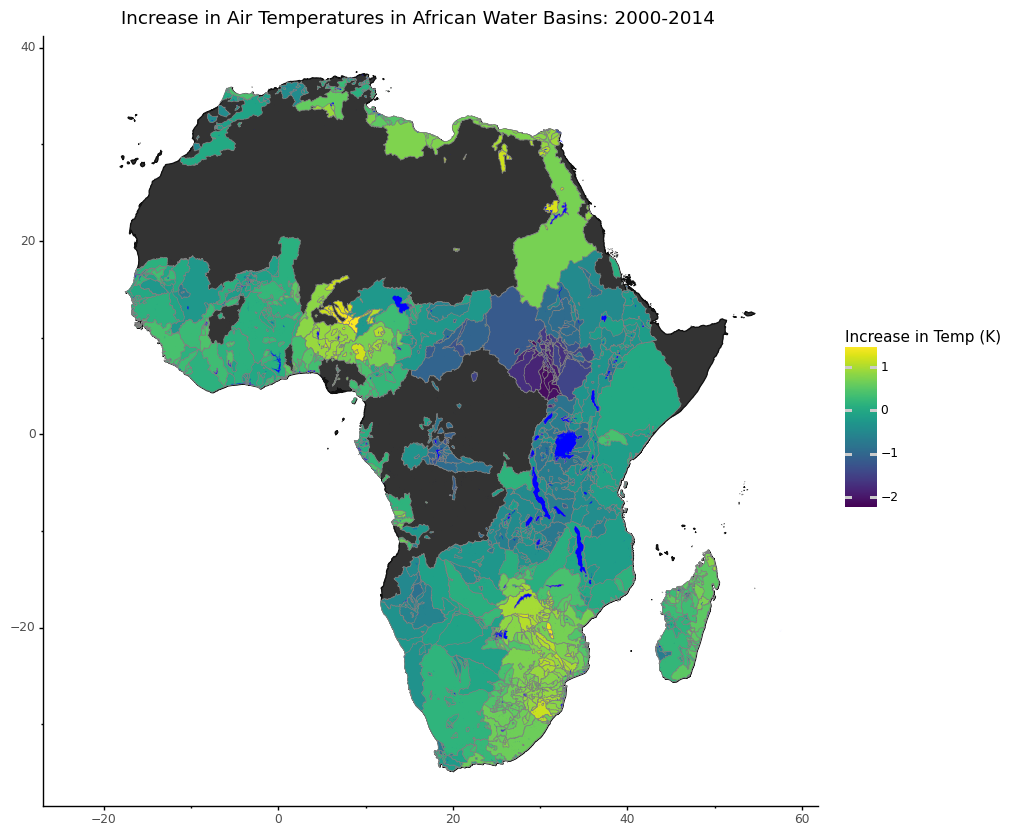

<ggplot: (8734122849521)>

In [ ]:
#Plotting a figure 
#geom_map()

plotnine.options.figure_size = (10, 10)


(
    ggplot()
      +geom_map(df_HydroBasin_1)
       + geom_map(Hydro_Basin_Temp, aes(fill='Change_in_Temp_2000_2014'), size=.25, color='gray')
      + geom_map(df_HydroLakes, fill ='blue', color = None)
      +ggtitle('Increase in Air Temperatures in African Water Basins: 2000-2014')
      +labs(fill = 'Increase in Temp (K)')
      +theme_classic()
)
